<br>

#  Local cost function

<br>

As we mentioned, there are two types of cost functions (i) global and (ii) local. We have seen the global cost function and because of it's shortcomings like barrean plateau as the size of the system under investigation increases. There comes local cost function to our rescue, as it gives us the best possible chance to tackle the ubiquitous barren plateau problem in the variational algorithms. 

<br>

The theoretical foundation for the local cost function is given below and the way in which the expectation value take the form. To our advantage we go from the need to calculate three expectation values to just calculating only one expectation value.

We have seen the global cost function in the second demonstrator, but now we will look at the local cost function theory and implementation. 

To this end, we map from the <b> global </b> to the <b> local </b> cost function, using the following transformation (same minimum)

\begin{align*}
\sum \limits_{m,n} c_m^\ast c_n \langle 0 \vert V^\dagger (\alpha) A_m^\dagger U {\vert 0 \rangle  \langle 0 \vert} U^\dagger A_n V (\alpha) \vert 0 \rangle \quad \rightarrow \quad  \sum \limits_{m,n} c_m^\ast c_n \langle 0 \vert V^\dagger (\alpha) A_m^\dagger U {P} U^\dagger A_n V (\alpha) \vert 0 \rangle
\end{align*}

with 

\begin{align*}
{P}=\dfrac{1}{2} - \dfrac{1}{2n} \sum \limits_{j=0}^{n-1} Z_j
\end{align*}

In <a href="https://arxiv.org/pdf/1909.05820.pdf">Bravo-Prieto et al.</a> this mapping relies on Eq.(D7). This local cost function is although easier to implement, has a worse convergence and success rate.

The big advatage of the mapping is, that after the transformation we only need to determine the following expectation values

\begin{align*}
& (i) \quad \  \langle 0 \vert V^\dagger (\alpha) A_m^\dagger  A_n V (\alpha) \vert 0 \rangle = \langle \psi (\alpha) \vert A_m^\dagger  A_n \vert \psi(\alpha) \rangle \\
& (ii) \quad \langle 0 \vert V^\dagger (\alpha) A_m^\dagger U Z_j U^\dagger A_n V (\alpha) \vert 0 \rangle = \langle \psi (\alpha) \vert A_m^\dagger U Z_j U^\dagger A_n \vert \psi(\alpha) \rangle
\end{align*}

Since unitary matrices satisfy

\begin{align}
U^\dagger = U^{-1} \quad \Rightarrow U U^\dagger = U U^{-1} = \mathbb{I}
\end{align}

let us define $ Z_{j=-1} = \mathbb{I}$. With this nomenclatur, we only need to evaluate one single expectation value for the <b> local </b> cost function, namely:

\begin{align*}
\quad \langle 0 \vert V^\dagger (\alpha) A_m^\dagger U Z_j U^\dagger A_n V (\alpha) \vert 0 \rangle
\end{align*}

for 

\begin{align*}
m,n \in \lbrace 0,1,2, \dots, N \rbrace  \quad \wedge \quad j \in \lbrace-1, 0, 1, \dots, n-1\rbrace
\end{align*}

Moreover, we <b> do not </b> need to control the variational gate $V(\alpha)$, since

\begin{align*}
\quad \langle 0 \vert V^\dagger (\alpha) A_m^\dagger U Z_j U^\dagger A_n V (\alpha) \vert 0 \rangle =  \langle \psi (\alpha) \vert A_m^\dagger U Z_j U^\dagger A_n  \vert \psi(\alpha) \rangle
\end{align*}

Even better, the unitariness of $U$ also allows us to <b> omit </b> the fact that we need to control $U$ and $U^\dagger$ it in the Hadamard test, as well (will be proven below). <br>

In what follows, we in particular prove, that the following circuit enables us the evaluate the expectation value above:

<br>

Figure 4: Hadamard test of the VQLS algorithm using the local cost function. The figure is taken from the <a href="https://pennylane.ai/qml/demos/tutorial_vqls.html">Pennylane documentation</a> and for internal use only.


In [ ]:
from IPython.display import Image
Image(r"Images/Local-Hadamard.png")

Analogously to the calculation above, we apply the ${\text{gates}}$ sucessively in the steps $(i)-(iii)$ and measure eventually.

<br>

Let us start with the Hadamard test for evaluating the real part of our expectation value of interest:

\begin{align*}
\vert 0 \rangle \otimes  \vert  \psi \rangle & \overset{(i)}{\rightarrow}  {H} \vert 0 \rangle \otimes  \vert  \psi \rangle = \dfrac{1}{\sqrt{2}} \left(  \vert 0 \rangle + \vert 1 \rangle \right) \otimes \vert \psi \rangle  \quad \\ & \overset{(ii)}{\rightarrow} \dfrac{1}{\sqrt{2}} \left(  \vert 0 \rangle + \vert 1 \rangle \right) \otimes   {CA^\dagger_{m,0,1} U C Z_{j,0,1} U^\dagger CA_{n,0,1}} \vert \psi \rangle  \\
& =  \dfrac{1}{\sqrt{2}} \left(  \vert 0  \rangle \otimes {U U^\dagger} \vert  \psi \rangle + \vert 1 \rangle \otimes A^\dagger_{m} U Z_{j} U^\dagger A_{n} \vert  \psi \rangle \right) \\
& =  \dfrac{1}{\sqrt{2}} \left(  \vert 0  \rangle \otimes  \vert  \psi \rangle + \vert 1 \rangle \otimes A^\dagger_{m} U Z_{j} U^\dagger A_{n} \vert  \psi \rangle \right)   
\\ & \overset{(iii)}{\rightarrow} \dfrac{1}{\sqrt{2}} \left(  {H}  \vert 0  \rangle \otimes  \vert  \psi \rangle +  {H} \vert 1 \rangle \otimes A^\dagger_{m} U Z_{j} U^\dagger A_{n} \vert  \psi \rangle \right) \\
& =  \dfrac{1}{2} \left( \left[   \vert 0  \rangle + \vert 1  \rangle \right] \otimes  \vert  \psi \rangle + \left[   \vert 0  \rangle - \vert 1  \rangle \right] \otimes A^\dagger_{m} U Z_{j} U^\dagger A_{n} \vert  \psi \rangle \right) \\
&  =\dfrac{1}{2} \left( \vert 0  \rangle \otimes \left[ \mathbb{I} + A^\dagger_{m} U Z_{j} U^\dagger A_{n} \right]   \vert  \psi \rangle + \vert 1 \rangle \otimes \left[  \mathbb{I}  - A^\dagger_{m} U Z_{j} U^\dagger A_{n} \right]  \vert  \psi \rangle \right) 
\end{align*}

By taking the difference of the probablity of measuring $0$ and $1$, we obtain the real value of the expectation value. Similar to the calculation of global cost function expectation values.

\begin{align*}
{P(0)-P(1)} & = \Big \vert \Big \vert \, [\mathbb{I} +  A^\dagger_{m} U Z_{j} U^\dagger A_{n}] \vert \psi \rangle \, \Big \vert \Big \vert^2 - \Big \vert \Big \vert \, [\mathbb{I} -  A^\dagger_{m} U Z_{j} U^\dagger A_{n}] \vert \psi \rangle \, \Big \vert \Big \vert^2 \\ & = \dfrac{1}{4} \langle \psi \vert [\mathbb{I} +  A^\dagger_{m} U Z_{j} U^\dagger A_{n}]^\dagger [\mathbb{I} +  A^\dagger_{m} U Z_{j} U^\dagger A_{n}] \vert \psi \rangle \\ & \quad - \dfrac{1}{4}\langle \psi \vert [\mathbb{I} -  A^\dagger_{m} U Z_{j} U^\dagger A_{n}]^\dagger [\mathbb{I} -  A^\dagger_{m} U Z_{j} U^\dagger A_{n}] \vert \psi \rangle \\
&= \dots =  {\mathrm{Re} \langle \psi \vert  A^\dagger_{m} U Z_{j} U^\dagger A_{n}  \vert \psi \rangle}
\end{align*}

Analogously, we can evaluate the imaginary part by introducing an additional phase gate for preperation:

\begin{align*}
\vert 0 \rangle \otimes  \vert  \psi \rangle & \overset{(i)}{\rightarrow} {P\left(-\frac{\pi}{2}\right) H}   \vert 0 \rangle \otimes  \vert  \psi \rangle = \dfrac{1}{\sqrt{2}} \left(  \vert 0 \rangle - i \vert 1 \rangle \right) \otimes \vert \psi \rangle  \quad \\ & \overset{(ii)}{\rightarrow} \dfrac{1}{\sqrt{2}} \left(  \vert 0 \rangle - i \vert 1 \rangle \right) \otimes   {CA^\dagger_{m,0,1} U C Z_{j,0,1} U^\dagger CA_{n,0,1}} \vert \psi \rangle  \\
& =  \dfrac{1}{\sqrt{2}} \left(  \vert 0  \rangle \otimes {U U^\dagger} \vert  \psi \rangle - i \vert 1 \rangle \otimes A^\dagger_{m} U Z_{j} U^\dagger A_{n} \vert  \psi \rangle \right) \\
& =  \dfrac{1}{\sqrt{2}} \left(  \vert 0  \rangle \otimes  \vert  \psi \rangle -i \vert 1 \rangle \otimes A^\dagger_{m} U Z_{j} U^\dagger A_{n} \vert  \psi \rangle \right)   
\\ & \overset{(iii)}{\rightarrow} \dfrac{1}{\sqrt{2}} \left(  {H}  \vert 0  \rangle \otimes  \vert  \psi \rangle -  {H} i \vert 1 \rangle \otimes A^\dagger_{m} U Z_{j} U^\dagger A_{n} \vert  \psi \rangle \right) \\
& =  \dfrac{1}{2} \left( \left[   \vert 0  \rangle + \vert 1  \rangle \right] \otimes  \vert  \psi \rangle -i \left[   \vert 0  \rangle - \vert 1  \rangle \right] \otimes A^\dagger_{m} U Z_{j} U^\dagger A_{n} \vert  \psi \rangle \right) \\
&  =\dfrac{1}{2} \left( \vert 0  \rangle \otimes \left[ \mathbb{I} -i A^\dagger_{m} U Z_{j} U^\dagger A_{n} \right]   \vert  \psi \rangle + \vert 1 \rangle \otimes \left[  \mathbb{I}  +i A^\dagger_{m} U Z_{j} U^\dagger A_{n} \right]  \vert  \psi \rangle \right) 
\end{align*}

\begin{align*}
{P(0)-P(1)} & = \Big \vert \Big \vert \, [\mathbb{I} -i A^\dagger_{m} U Z_{j} U^\dagger A_{n}] \vert \psi \rangle \, \Big \vert \Big \vert^2 - \Big \vert \Big \vert \, [\mathbb{I} + i  A^\dagger_{m} U Z_{j} U^\dagger A_{n}] \vert \psi \rangle \, \Big \vert \Big \vert^2 \\ & = \dfrac{1}{4} \langle \psi \vert [\mathbb{I} - i  A^\dagger_{m} U Z_{j} U^\dagger A_{n}]^\dagger [\mathbb{I} -i  A^\dagger_{m} U Z_{j} U^\dagger A_{n}] \vert \psi \rangle \\ & \quad - \dfrac{1}{4}\langle \psi \vert [\mathbb{I} + i  A^\dagger_{m} U Z_{j} U^\dagger A_{n}]^\dagger [\mathbb{I} + i  A^\dagger_{m} U Z_{j} U^\dagger A_{n}] \vert \psi \rangle \\
&= \dots =  {\mathrm{Im} \langle \psi \vert  A^\dagger_{m} U Z_{j} U^\dagger A_{n}  \vert \psi \rangle}
\end{align*}

$\dots$ and evaulte the overall expectation value by adding real and imaginary part

<br>

\begin{align*}
\langle \psi \vert  A^\dagger_{m} U Z_{j} U^\dagger A_{n}  \vert \psi \rangle = \mathrm{Re} \langle \psi \vert  A^\dagger_{m} U Z_{j} U^\dagger A_{n}  \vert \psi \rangle + i \, \mathrm{Im} \langle \psi \vert  A^\dagger_{m} U Z_{j} U^\dagger A_{n}  \vert \psi \rangle
\end{align*}

Notice how $ {U U^\dagger = \mathbb{I}}$ allows us to drop the control line of the Hadamard test.

<b> Last (optimization) step </b>:

- Adjust the parateters $\alpha$ classically and optimize the costfunction (<a href="https://link.springer.com/content/pdf/10.1007/s11128-021-03140-x.pdf">ongoing research topic</a>)

    - Use SPSA if their is noise 
    - Use COBYLA if you are noise-free (no shot-noise, as well)

    <br>

- Return the optimal result 
\begin{align*}
\vert \psi (\alpha_\mathrm{opt})\rangle = A \vert x (\alpha_\mathrm{opt}) \rangle \approx \vert b \rangle
\end{align*}



In the case of local cost function, we have all the functions (matrices and vectors involved in calculating the expectation values) are all defined in the main program. 

In [31]:
# Grab functions and modules from dependencies
import math
import numpy as np
from scipy.optimize import minimize, fmin_cg, OptimizeResult
from scipy.sparse import csr_matrix
from qiskit.algorithms.optimizers import SPSA
import mthree
from scipy.sparse import random
from scipy import stats
from numpy.random import default_rng
from numpy import linalg as LA

#from collections.abc import Iterable
import functools
import inspect
import itertools
#import numbers
from operator import matmul

# Grab functions and modules from Qiskit needed
import qiskit
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, execute, transpile, Aer, assemble
from qiskit.circuit import ParameterVector
import qiskit.circuit.library.n_local as lib_local
from qiskit.circuit import Gate

#from qiskit.providers.aer import UnitarySimulator
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_bloch_multivector

#from qiskit.opflow import X, Y, Z, Zero, One, I
from qiskit.quantum_info.operators.symplectic.pauli_list import PauliList
from qiskit.quantum_info.operators.symplectic.pauli import Pauli

from qiskit.quantum_info import SparsePauliOp

from qiskit.circuit.library import EfficientSU2, TwoLocal, NLocal, PauliTwoDesign
#from qiskit_nature.circuit.library import UCCSD, PUCCD, SUCCD

from qiskit.providers.ibmq.runtime import UserMessenger

# Plotting
import matplotlib.pyplot as plt
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from qiskit import IBMQ

from typing import List, Union

In the Local cost function, we only need to calculate one expectation value $\langle \psi \vert  A^\dagger_{m} U Z_{j} U^\dagger A_{n}  \vert \psi \rangle$ unlike in the global cost funcion. The logic of the program is as follows: 

- First, we determine the number of the qubits depending on the vector
- We decompose the matrix into string og Pauli operatos along with the coefficients
- We then take the ansatz input which can be custom made (Hardware efficient) or import ansatzes from the qiskit library
- we then calculate the expectation value and the cost function. We do that by seeing the optimization routine, the user has requested, eg. SPSA verses SciPy ones, and dispatch to the correct optimizer. The selected optimizer starts at x0 and calls 'cost_loc' everytime the optimizer needs to evaluate the cost function. The result is returned as a SciPy OptimizerResult object.
- Finally, we end up with the result, cost function and the quantum solution.

Once the matrix and vector are given as an input, we can start building the quantum circuit. The number of qubits required to build the circuit is log of the length of the vector.

In [10]:
vector=np.ones(4)
num_qubits = int(np.log2(len(vector))) # number of system qubits
tot_qubits = num_qubits + 1  # Addition of an ancillary qubit
ancilla_idx = num_qubits  # Index of the ancillary qubit for the Hadamard test(last position)

Decomposing the given matrix into pauli operators and coefficients

In [8]:
#Convert the matrix to Hamiltonian
matrix = np.array([[ 1,0,  0.  ,  0. ],
       [-0.81,  2.62, -0.81,  0. ,],
       [ 0.  , -0.81,  2.62, -0.81],
       [ 0.  ,  0.  , 0,1]])
pauli_op = SparsePauliOp.from_operator(matrix) 
coeffs = pauli_op.coeffs
obs_list = pauli_op.paulis

Since $A_m, U, A_m^{\dag}$ are the terms in the above expextation value. We can look at them one by one and build the quantum circuit for each of them.  

Controlled $CA$ takes in the input of number of qubits, PauliList of pauli operators and idx to select the pauli operator string. 

We get the quantum circuit with the number of qubits needed and with the Pauli gates applied on each of the qubit and we then convert the quantum circuit to gate.

In [12]:
def CA(qc, obs_list, idx):

    operators = obs_list[idx]   

    for j in reversed(range(len(operators))):
        if operators[j] == Pauli('I'):
            None
        elif operators[j] == Pauli('X'):
            qc.cx(ancilla_idx, j)
        elif operators[j] == Pauli('Y'):
            qc.cy(ancilla_idx, j)
        elif operators[j] == Pauli('Z'):
            qc.cz(ancilla_idx, j)
    return qc

the transpiled circuit for the backend is:

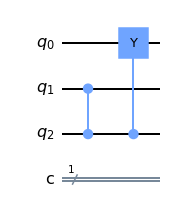

In [13]:
backend = Aer.get_backend('qasm_simulator') # using qasm simulator as backend. 
qc = QuantumCircuit(num_qubits+1, 1)
mycirc = CA(qc,obs_list,4)
mycirc = transpile(mycirc, backend)
mycirc.draw('mpl')

Similyrly for controlled $CA_{dag}$

In [16]:
def CA_dag(qc, obs_list, idx):

    operators = obs_list[idx]   

    for j in range(len(operators)):
        if operators[j] == Pauli('I'):
            None
        elif operators[j] == Pauli('X'):
            qc.cx(ancilla_idx, j)
        elif operators[j] == Pauli('Y'):
            qc.cy(ancilla_idx, j)
        elif operators[j] == Pauli('Z'):
            qc.cz(ancilla_idx, j)
    return qc   

transpiled circuit takes the form for the given backend:

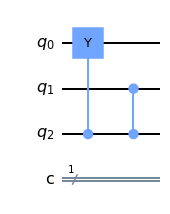

In [17]:
qc_dag = QuantumCircuit(num_qubits+1, 1)
mycirc_dag = CA_dag(qc_dag,obs_list,4)
mycirc_dag = transpile(mycirc_dag, backend)
mycirc_dag.draw('mpl')

In the expectation value, we have the $V^{\dagger}$ and $U^{\dagger}$, therefore we can have a look at how to produce this circuits. So complex conjugate of the unitary operators are inverse of a quantum circuit for unitary operator. Below, we see an example of an ansatz and also it's inverse.

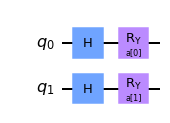

In [18]:
def custom_ansatz(num_qubits):
    
    circ = QuantumCircuit(num_qubits) # building the quantum circuit
    theta = ParameterVector('a', length = num_qubits) # initializing the parametere for the ansatz
    
    for idx in range(num_qubits):
        circ.h(idx)

    #A very minimal variational circuit.
    for idx in range(num_qubits):
        #print(idx, element)
        circ.ry(theta[idx], idx)
    
    return circ, len(theta)

ansatz_circuit, num_params = custom_ansatz(2)
ansatz_circuit.draw('mpl')

After transpiling tha ansatz on the backend, we obtain the following circuit.

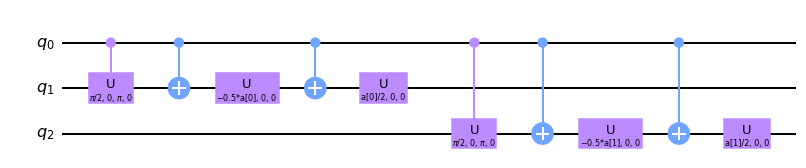

In [19]:
Ansatz_gate = ansatz_circuit.to_gate(label="ansatz")
CAnsatz_gate = Ansatz_gate.control(1) 

new_qc = QuantumCircuit(3)
new_qc.append(CAnsatz_gate, [0, 1, 2])

new_qc = transpile(new_qc, backend)
new_qc.draw('mpl')

we can easily get the inverse of the circuit by invoking the inverse function in the qiskit.

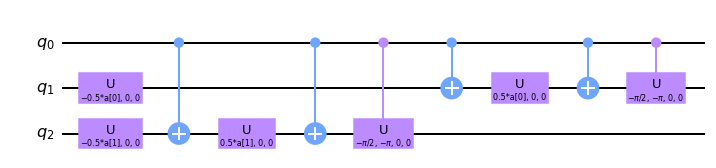

In [20]:
new_qc_inverse = transpile(new_qc, backend)
new_qc_inverse = new_qc_inverse.inverse()
new_qc_inverse.draw('mpl')

Similar procedure goes for $U^{\dagger}$. Building $U$ circuit and inversing the circuit, we obtain $U^{\dagger}$

In [21]:
def U_b(vector: np.array, to_gate:True):
    
    n = int(np.log2(len(vector)))
    qc = QuantumCircuit(n)
    qc.isometry(vector / np.linalg.norm(vector), list(range(n)), None)
    qc = transpile(qc, backend)
    
    return qc.to_gate(label="$U_b$") if to_gate else qc

In [ ]:
vector = np.ones(4)
my_circ1 = U_b(vector,to_gate=False)
my_circ1 = transpile(my_circ1, backend)
my_circ1.draw('mpl')

$U^{\dagger}$ circuit is:

In [ ]:
mycirc1_inv = my_circ1.inverse()
mycirc1_inv.draw('mpl')

Having dealt with the operators used to calculate the expectation valie, we combine them and write the main program. The explanation of step by by step code is given as follows:

- First, we determine the number of qubits based on the vector.
- The matrix is decomposed into a string of Pauli operatos along with the coefficients.
- To begin, we select the ansatz input, which can be either a user-created (Hardware-efficient) version or one of the predefined versions found in the qiskit library.

- The expectation values are then computed.
- We compute the cost function by comparing the optimization routines requested by the user, such as SPSA versus SciPy, and dispatching to the appropriate optimizer. The chosen optimizer starts at x0 and calls 'cost_loc' every time the cost function needs to be evaluated. The outcome is a SciPy OptimizerResult object.
- Finally, we have the result, the cost function, and the quantum solution.

In [32]:
# The entrypoint for our Runtime Program
def main(backend, user_messenger,
         matrix,
         vector,
         ansatz,
         ansatz_config,
         ansatz_circuit,
         num_params,
         x0,
         optimizer,
         optimizer_config,
         shots,
        ):
    
    
    #determine number of qubits
    num_qubits = int(np.log2(len(vector))) # number of system qubits
    tot_qubits = num_qubits + 1  # Addition of an ancillary qubit
    ancilla_idx = num_qubits  # Index of the ancillary qubit for the Hadamard test(last position)
    
    #Convert the matrix to Hamiltonian
    pauli_op = SparsePauliOp.from_operator(matrix) 
    coeffs = pauli_op.coeffs
    obs_list = pauli_op.paulis
    
    if ansatz=='custom':
        
        ansatz_circuit = ansatz_circuit
        num_params = num_params
        
    else: 
            
        # We grab the requested ansatz circuit class from the Qiskit circuit library
        # n_local module and configure it using the number of qubits and options
        # passed in the ansatz_config.
        ansatz_instance = getattr(lib_local, ansatz)
        ansatz_circuit = ansatz_instance(num_qubits, **ansatz_config)

        # Get the number of parameters in the ansatz circuit.
        num_params = ansatz_circuit.num_parameters
    
    # Use a given initial state, if any, or do random initial state.
    if x0:
        x0 = np.asarray(x0, dtype=float)
        if x0.shape[0] != num_params:
            raise ValueError('Number of params in x0 ({}) does not match number \
                              of ansatz parameters ({})'. format(x0.shape[0],
                                                                 num_params))
    else:
        x0 = 2*np.pi*np.random.rand(num_params)  
        #x0 = [float(np.random.randint(0,10))/1000 for i in range(0, num_params)]
           
    
    # Here we define a callback function that will stream the optimizer parameter vector
    # back to the user after each iteration.  This uses the `user_messenger` object.
    # Here we convert to a list so that the return is user readable locally, but
    # this is not required.
        
    def callback(xk):
        user_messenger.publish(list(xk))

    
    def CA(qc, obs_list, idx):

        operators = obs_list[idx]   

        for j in reversed(range(len(operators))):
            if operators[j] == Pauli('I'):
                None
            elif operators[j] == Pauli('X'):
                qc.cx(ancilla_idx, j)
            elif operators[j] == Pauli('Y'):
                qc.cy(ancilla_idx, j)
            elif operators[j] == Pauli('Z'):
                qc.cz(ancilla_idx, j)
            
    def CA_dag(qc, obs_list, idx):

        operators = obs_list[idx]   

        for j in range(len(operators)):
            if operators[j] == Pauli('I'):
                None
            elif operators[j] == Pauli('X'):
                qc.cx(ancilla_idx, j)
            elif operators[j] == Pauli('Y'):
                qc.cy(ancilla_idx, j)
            elif operators[j] == Pauli('Z'):
                qc.cz(ancilla_idx, j)
                
    def local_hadamard_test(weights, l=None, lp=None, j=None, part=None):
    
        qc = QuantumCircuit(num_qubits+1, 1)

        # First Hadamard gate applied to the ancillary qubit.
        qc.h(ancilla_idx)

        # For estimating the imaginary part of the coefficient "mu", we must add a "-i"
        # phase gate.
        if part == "Im" or part == "im":
            qc.p(-np.pi / 2, ancilla_idx)

        qubit_list = []

        for s in range(num_qubits):
            qubit_list.append(s)
            
        # Variational circuit generating a guess for the solution vector |x>
        qc.append(ansatz_circuit.bind_parameters(weights), qubit_list)

        qc.barrier()
        # Controlled application of the unitary component A_l of the problem matrix A.
        CA(qc, obs_list, l)

        nb = int(np.log2(len(vector)))
        vector_circuit = QuantumCircuit(nb)
        vector_circuit.isometry(vector / np.linalg.norm(vector), list(range(nb)), None)
        vector_circuit = vector_circuit.inverse()

        qc.append(vector_circuit, qubit_list)

        qc.barrier()

        # Controlled Z operator at position j. If j = -1, apply the identity.
        if j != -1:
            qc.cz(ancilla_idx, j)

        qc.barrier()

        # Unitary U_b associated to the problem vector |b>.
        qc.isometry(vector / np.linalg.norm(vector), list(range(nb)), None)

        # Controlled application of Adjoint(A_lp).
        CA_dag(qc, obs_list, lp)
        #CA(qc, obs_list, lp)

        qc.barrier()
        # # Second Hadamard gate applied to the ancillary qubit.
        qc.h(ancilla_idx)

        qc = transpile(qc, basis_gates=['id', 'rz', 'sx', 'x', 'cx'])
        qc.barrier()
        qc.measure(ancilla_idx, 0)

        job = backend.run(qc, shots=shots)
        result = job.result().get_counts()


        if len(result)==1:
            for s in result.keys():
                if s=='0':
                    expectation = result['0']/shots
                if s=='1':
                    expectation = -result['1']/shots
        else:        
            expectation = (result['0']-result['1'])/shots

        return expectation
    
    def mu(weights, l=None, lp=None, j=None):
        """Generates the coefficients to compute the "local" cost function C_L."""

        mu_real = local_hadamard_test(weights, l=l, lp=lp, j=j, part="Re")
        mu_imag = local_hadamard_test(weights, l=l, lp=lp, j=j, part="Im")
        
        return mu_real + 1.0j * mu_imag
    
    def psi_norm(weights):
        """Returns the normalization constant <psi|psi>, where |psi> = A |x>."""
        norm = 0.0

        for l in range(0, len(coeffs)):
            for lp in range(0, len(coeffs)):
                norm = norm + coeffs[l] * np.conj(coeffs[lp]) * mu(weights, l, lp, -1)

        return abs(norm)

    
    def cost_loc(weights):
        """Local version of the cost function. Tends to zero when A|x> is proportional to |b>."""
        mu_sum = 0.0

        for l in range(0, len(coeffs)):
            for lp in range(0, len(coeffs)):
                for j in range(0, num_qubits):
                    mu_sum = mu_sum + coeffs[l] * np.conj(coeffs[lp]) * mu(weights, l, lp, j)

        mu_sum = abs(mu_sum)
        pn = psi_norm(weights)

        # Cost function C_L
        cf = 0.5 - 0.5 * mu_sum / (num_qubits * pn)

        cost_function.append(cf)

        return cf
    
    # Here is where we actually perform the computation.  We begin by seeing what
    # optimization routine the user has requested, eg. SPSA verses SciPy ones,
    # and dispatch to the correct optimizer.  The selected optimizer starts at
    # x0 and calls 'cost_loc' everytime the optimizer needs to evaluate the cost
    # function.  The result is returned as a SciPy OptimizerResult object.
    # Additionally, after every iteration, we use the 'callback' function to
    # publish the interm results back to the user. This is important to do
    # so that if the Program terminates unexpectedly, the user can start where they
    # left off.
    
    cost_function = []
    
    # Since SPSA is not in SciPy need if statement
    if optimizer == 'SPSA':
        opt = SPSA(maxiter=500)
        res = opt.minimize(cost_loc,x0)
    # All other SciPy optimizers here
    else:
        res = minimize(cost_loc, x0, method=optimizer,options=optimizer_config, callback=callback)
    # Return result. res is a subclass of dict.
    
    circ = ansatz_circuit.bind_parameters(res.x)
    circ.measure_all()
    
    t_circ = transpile(circ, backend)
    job = backend.run(t_circ, shots=shots)
    result = job.result()
    
    sorted_keys = sorted(result.get_counts())
    solution_probabilities = np.zeros(2**num_qubits)
    i=0
    for key in sorted_keys:
        solution_probabilities[i] = result.get_counts()[key]
        i=i+1

    o = solution_probabilities/shots
    
    # quantum probabilities to actual classical solution
    quantum_solution = np.sqrt(np.real(o))*np.linalg.norm(vector)
    
    
    return res, cost_function, quantum_solution,

Giving the inputs for backend, matrx and vector.

In [33]:
backend = Aer.get_backend('qasm_simulator')
msg = UserMessenger()

matrix = np.eye(2)
vector = np.ones(2)

A_inv = np.linalg.inv(matrix)
classical_solution = np.dot(A_inv, vector)

Executing the main program to obtain the result, cost function and quantum solution

In [34]:
# Execute the main routine for our sparseMatrix and vector
# Try another qiskit ansatz: EfficientSU2, TwoLocal, NLocal, PauliTwoDesign, UCCSD, PUCCD, SUCCD
# Or another scipy optimizer: SPSA, Nelder-Mead, Powell, CG, BFGS, Newton-CG, L-BFGS-B, TNC, COBYLA, SLSQP etc.


result, cost_fn, quantum_solution = main(backend,msg,
                                         matrix,
                                         vector,
                                         ansatz='TwoLocal',
                                         ansatz_config={'reps': 3, 'entanglement': 'linear', 'rotation_blocks': ['ry', 'rz'], 'entanglement_blocks': 'cx'},
                                         ansatz_circuit = None,
                                         num_params = None,
                                         x0=None,
                                         optimizer='COBYLA',
                                         optimizer_config={'maxiter': 200},
                                         shots = 1024,
                                         )


c:\Users\mummanen\Anaconda3\lib\site-packages\scipy\optimize\_minimize.py:548: RuntimeWarning: Method COBYLA does not support callback.
  warn('Method %s does not support callback.' % method, RuntimeWarning)


Visualization of the results (both cost function and quantum solution).

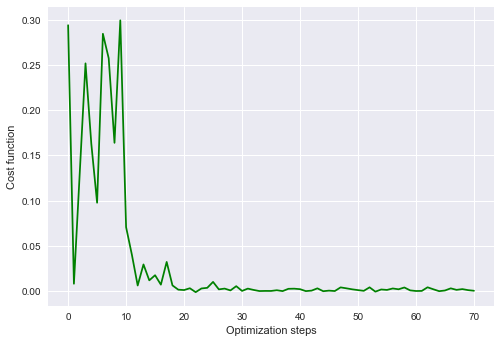

In [35]:
plt.style.use("seaborn")
plt.plot(cost_fn, "g")
plt.ylabel("Cost function")
plt.xlabel("Optimization steps")
plt.show()

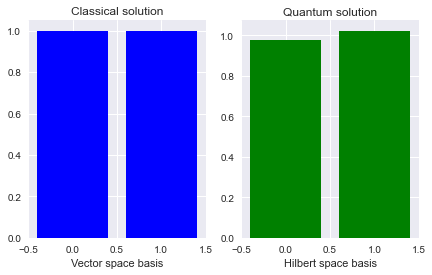

In [36]:
num_qubits = int(np.log2(len(vector)))
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(7, 4))

ax1.bar(np.arange(0, 2 ** num_qubits), classical_solution, color="blue")
ax1.set_xlim(-0.5, 2 ** num_qubits - 0.5)
ax1.set_xlabel("Vector space basis")
ax1.set_title("Classical solution")

ax2.bar(np.arange(0, 2 ** num_qubits), quantum_solution, color="green")
ax2.set_xlim(-0.5, 2 ** num_qubits - 0.5)
ax2.set_xlabel("Hilbert space basis")
ax2.set_title("Quantum solution")

plt.show()

Therefore with that we have reached the end of this VQLS demonstrator. To recap, (i) we learnt the conversion of PDEs to linear system of equations, (ii) along with the intution behind the algorithm, we have learnt the rigorous theory of the algorithm, (iii) global cost function was studied step by step and leant how to calculate the expectation values on the quantum hardware, (iv) finally we looked into local cost function and it's theory. Although the VQLS algorithm was succesfully demonstrated, we still have a long way to go interms of efficiency of the algorithm. 
<br>

Following are the some of the challenges we listed:

Challanges:

- Find an efficient matrix decomposition of $A$ 
- Initialize the state $\vert b \rangle $ efficiently $\vec{b} \neq \vec{0}$
- Compare local cost function vs. global cost function (barren-plateaus vs. local minima). 
- Read out the entire vector $\vert \psi_{\mathrm{optimal}} \rangle = A \vert x_{\mathrm{optimal}} \rangle$ with only a finite amount of shots (not an exponential scaling)
